# Analysis of the DeePyMoD Output for Van der Pol

In [1]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re

In [2]:
# load folder directory of batch
batch = "batch_10-07_VanderPol"
out_dir = f"C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster/{batch}/"

# run_specifications
n_taxa = 2

# list files in batch run
# os.listdir(out_dir)

['output_batch_10-07_VanderPol_run00_10_100_th0-01_int2',
 'output_batch_10-07_VanderPol_run00_10_100_th0-01_int4',
 'output_batch_10-07_VanderPol_run00_10_100_thNo_int2',
 'output_batch_10-07_VanderPol_run00_10_100_thNo_int4',
 'output_batch_10-07_VanderPol_run00_10_50_th0-01_int2',
 'output_batch_10-07_VanderPol_run00_10_50_th0-01_int4',
 'output_batch_10-07_VanderPol_run00_10_50_thNo_int2',
 'output_batch_10-07_VanderPol_run00_10_50_thNo_int4',
 'output_batch_10-07_VanderPol_run00_50_100_th0-01_int2',
 'output_batch_10-07_VanderPol_run00_50_50_th0-01_int2',
 'output_batch_10-07_VanderPol_run00_50_50_thNo_int2',
 'output_batch_10-07_VanderPol_run00_50_50_thNo_int4',
 'output_batch_10-07_VanderPol_run00_5_100_th0-01_int4',
 'output_batch_10-07_VanderPol_run00_5_100_thNo_int2',
 'output_batch_10-07_VanderPol_run00_5_100_thNo_int4',
 'output_batch_10-07_VanderPol_run01_10_100_th0-01_int2',
 'output_batch_10-07_VanderPol_run01_10_100_th0-01_int4',
 'output_batch_10-07_VanderPol_run01_10_

## Create one summary plot that contains all estimated model coefficients for all runs for one specification

The following code helps to summarize the output files over several runs.
It counts in multiple estimated coefficients outputs the library values that are not zero or even greater than 1e-5.

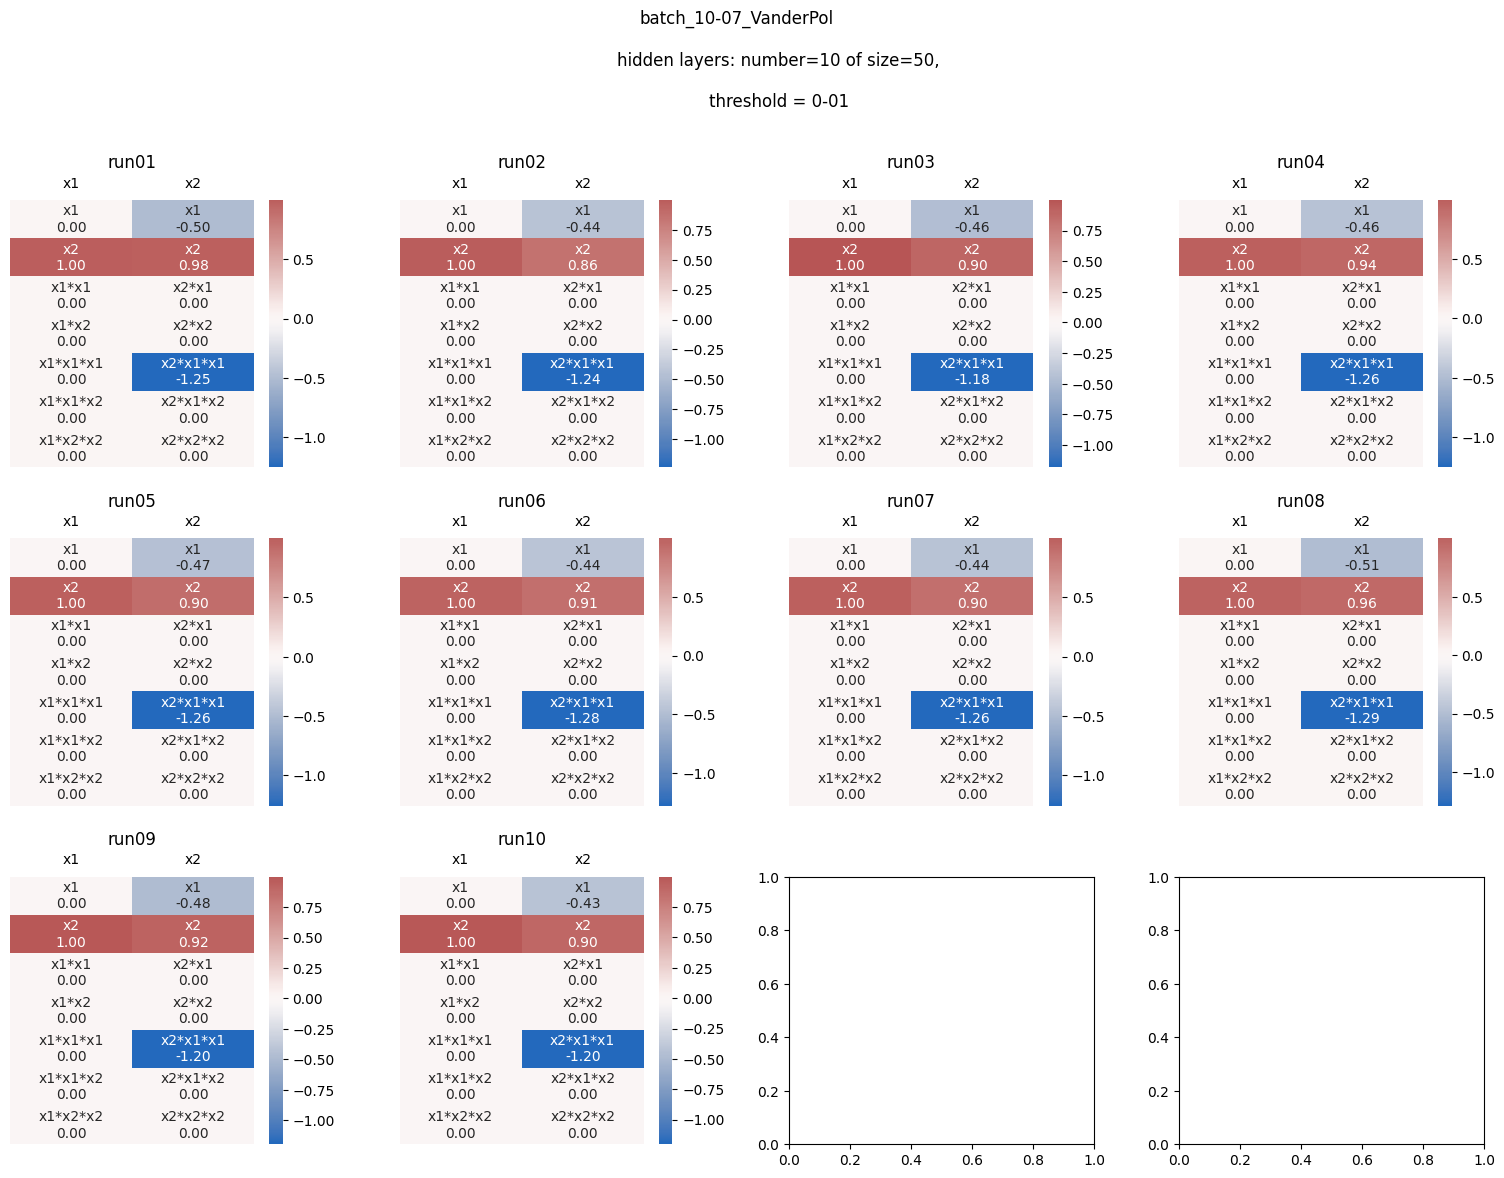

In [3]:
hl_number = 10
hl_size = 50
th = "0-01"
int_order = "4"

spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
# get list of available runs for the given setting
runs = []
for file in [s for s in os.listdir(out_dir) if spec in s]:
    m = re.search('run(.+?)_', file)
    if m:
        runs.append(m.group(1))

# specify dimensions of the plot
n_runs = len(runs)
# check if runs for these specifications are available
if n_runs > 0:
    # specify dimensions of the plot
    n_row = int(n_runs/4) + 1
    n_col = 4

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(4*n_col)
    fig.set_figheight(4*n_row)
    fig.suptitle(f"""{batch}\n
                hidden layers: number={hl_number} of size={hl_size},\n
                threshold = {th}""", y=1.0)
    fig.tight_layout(pad=3.0)
    for run in np.arange(20):
        out_tmp = f"{out_dir}output_{batch}_run{(run+1):02}{spec}/Data/"
        if os.path.exists(f"{out_tmp}model_estimated_coeffs.csv"):
            # read data files
            df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
            df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

            # define labels
            results = np.asarray(df_model_coeffs_tmp)
            strings = np.asarray(df_library_tmp)
            labels = (np.asarray(["{0}\n{1:.2f}".format(string, value)
                                for string, value in zip(strings.flatten(),
                                                        results.flatten())])
                    ).reshape(df_library_tmp.shape[0], n_taxa)
            
            # make heatmap
            sns.heatmap(df_model_coeffs_tmp, annot=labels, fmt="", cmap="vlag", center=0, ax=axs[int(run/n_col), run%n_col],
                         yticklabels=False)
            # sns.heatmap(df_model_coeffs_tmp, cmap="vlag", center=0, annot=True, ax=axs[int(run/n_col), run%n_col])
            axs[int(run/n_col), run%n_col].xaxis.tick_top()
            axs[int(run/n_col), run%n_col].tick_params(top=False) # left=False, 
            axs[int(run/n_col), run%n_col].set_title(f"run{(run+1):02}")
    plt.yticks(rotation=0)
    plt.show()

### Create one plot per specification that counts how often a library value was not 0

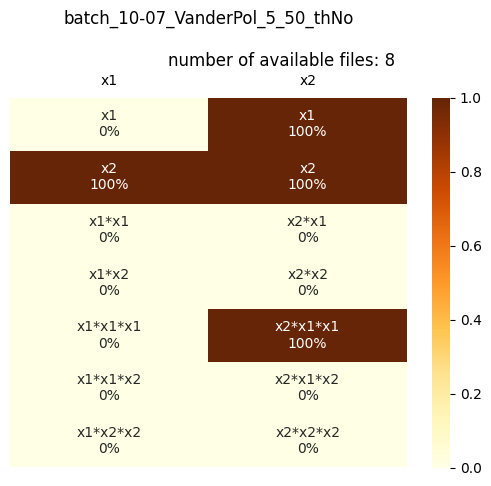

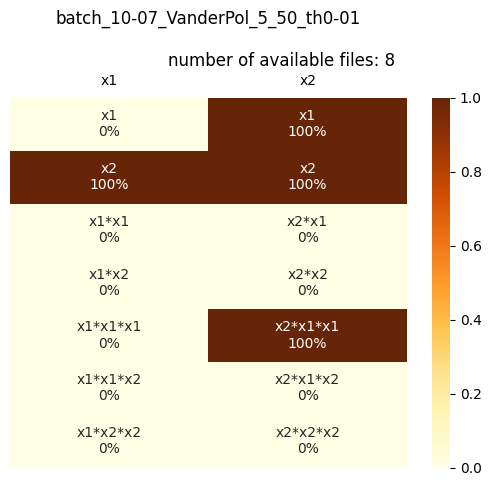

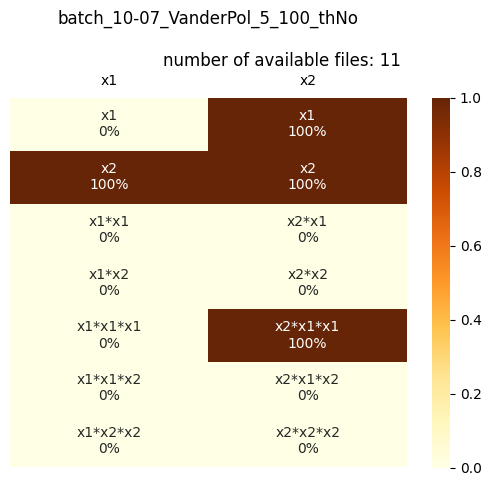

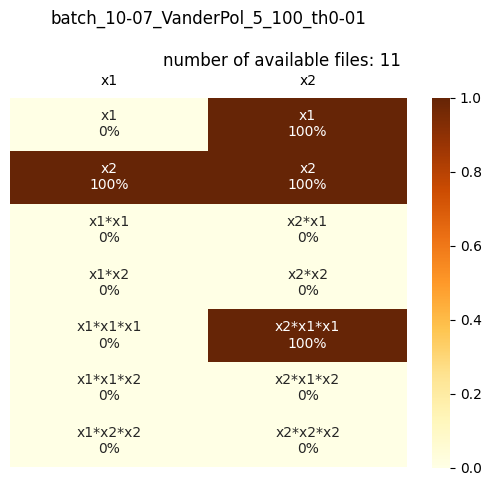

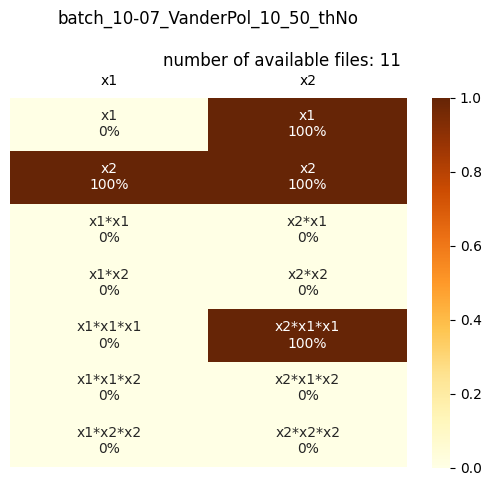

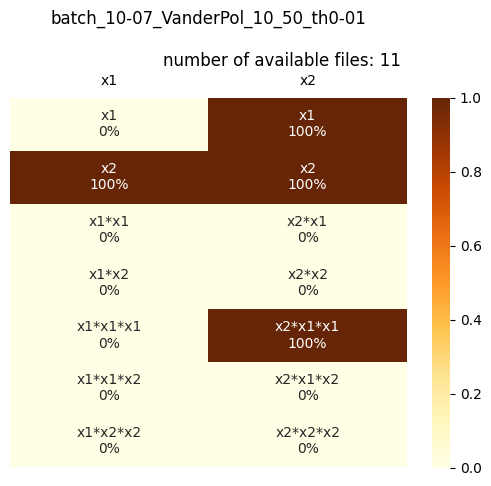

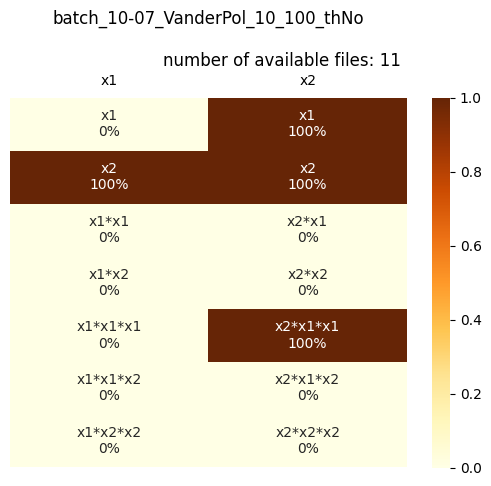

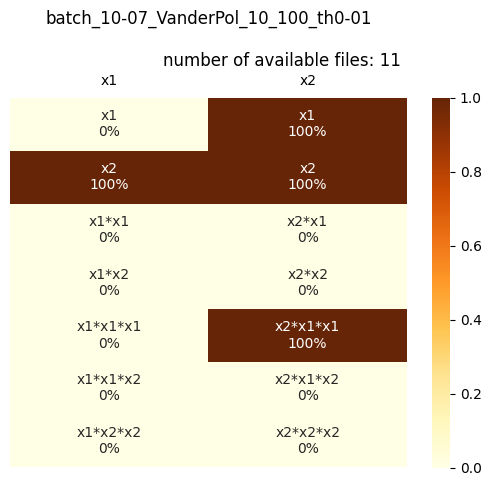

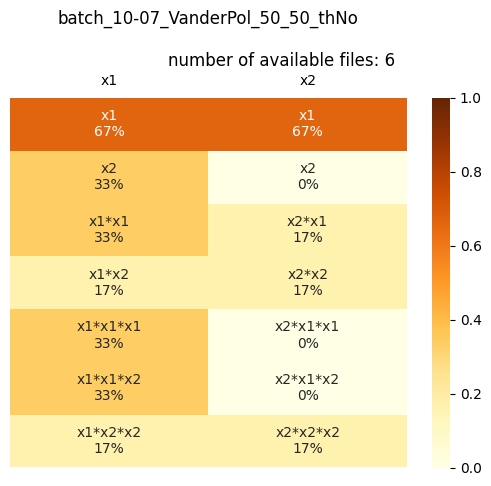

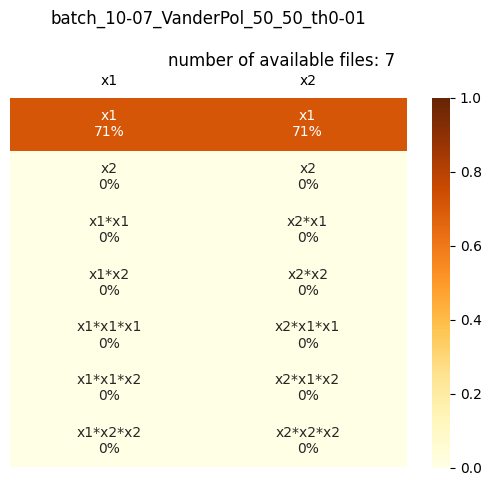

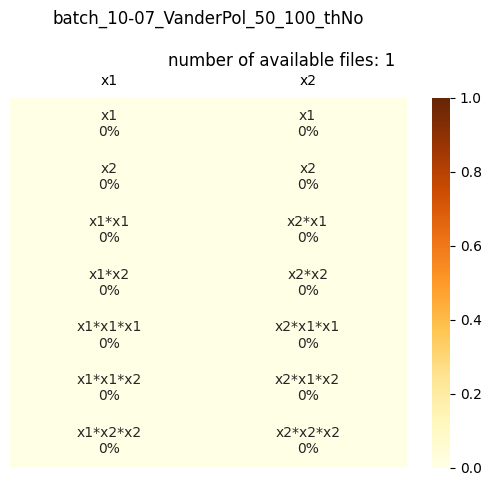

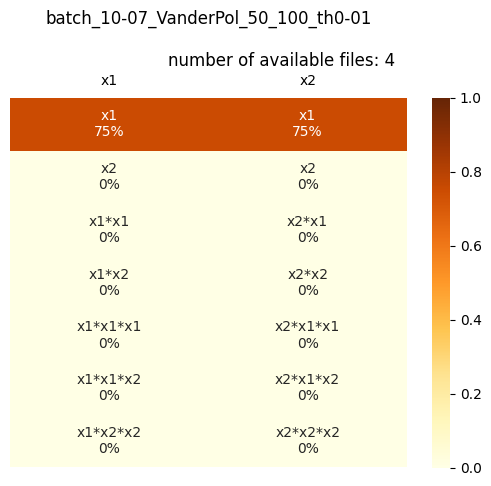

In [4]:
for hl_number in [5, 10, 50]: #[20, 50]:
    for hl_size in [50, 100]: #, 80, 100
        for th in ["No", "0-01"]: # "0_1", "0_01",
            int_order = 4
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(m.group(1))
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # create zero dataframe of the shape of the output
                file = os.listdir(out_dir)[0]
                out_tmp = f"{out_dir}output_{batch}_run{runs[0]}{spec}/Data/"
                df_sparsity_mask_all = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_sparsity_mask_all.iloc[:] = 0
                count = 0
                for run in runs:
                    out_tmp = f"{out_dir}output_{batch}_run{run}{spec}/Data/"
                    if os.path.exists(out_tmp):
                        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                        df_sparsity_mask_tmp = (abs(df_model_coeffs_tmp) > 0.1).astype(int)
                        df_sparsity_mask_all = df_sparsity_mask_tmp.add(df_sparsity_mask_all)
                        count += 1

                df_sparsity_mask_all = df_sparsity_mask_all/count

                # read library values
                df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

                # define labels
                results = np.asarray(df_sparsity_mask_all)
                strings = np.asarray(df_library_tmp)
                labels = (np.asarray(["{0}\n{1:.0f}%".format(string, value*100)
                                    for string, value in zip(strings.flatten(),
                                                            results.flatten())])
                        ).reshape(df_library_tmp.shape[0], n_taxa)
                
                # heatmap
                ax = sns.heatmap(df_sparsity_mask_all, cmap="YlOrBr", vmin=0, vmax=1, annot=labels, fmt="", yticklabels=False)
                ax.xaxis.tick_top()
                ax.tick_params(left=False, top=False)
                ax.set_title(f"""{batch}_{hl_number}_{hl_size}_th{th}\n
                            number of available files: {count}""")
                plt.yticks(rotation=0)
                plt.show()

### Calculate mean values over all runs for each library coefficient

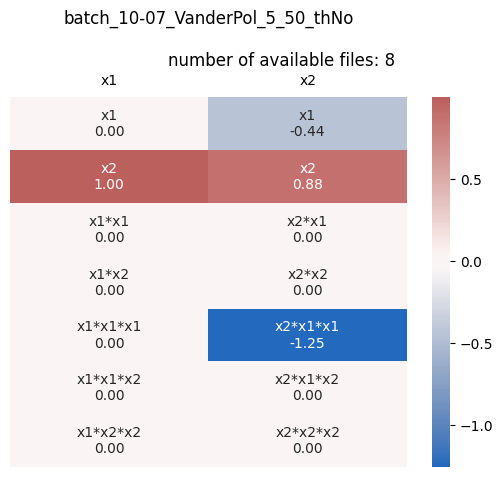

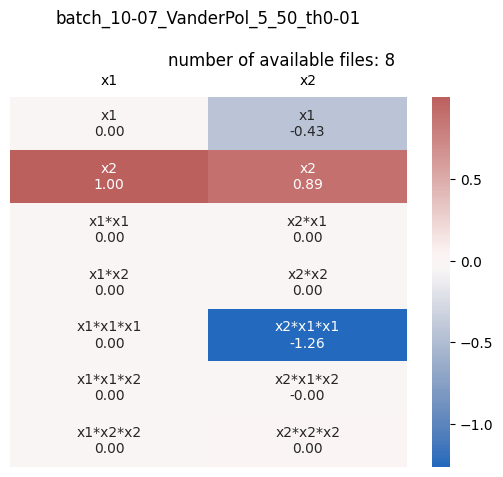

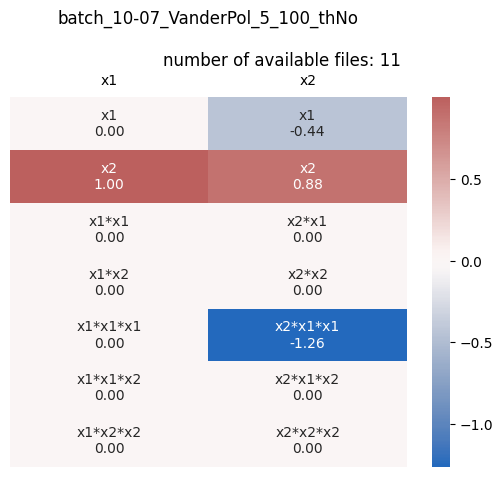

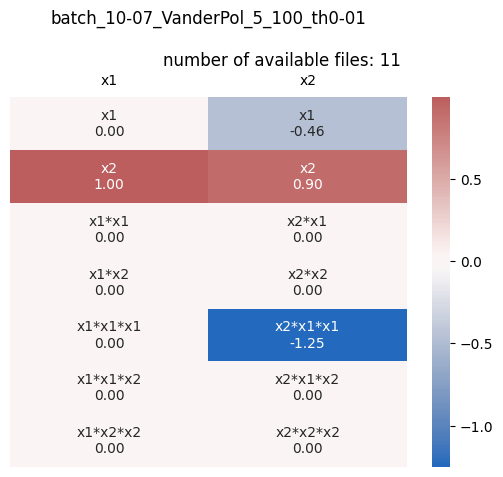

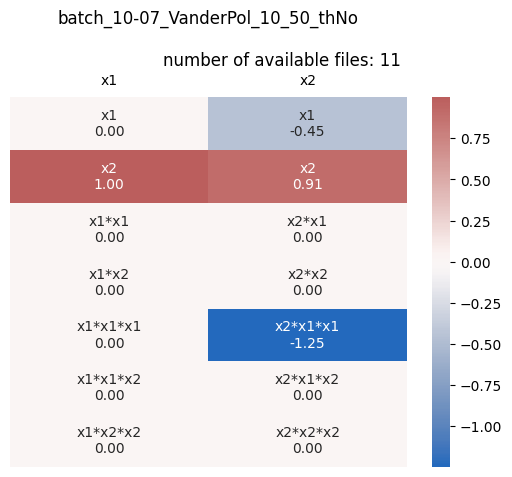

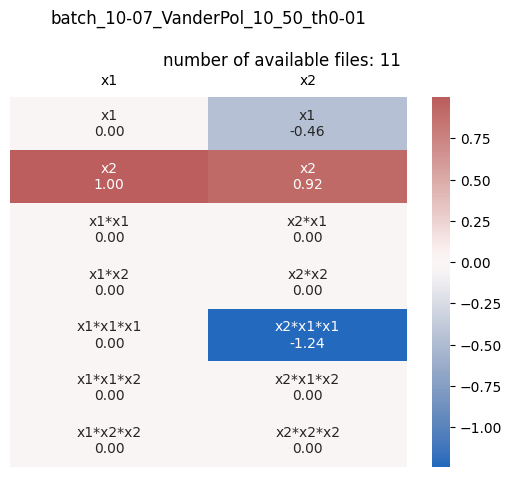

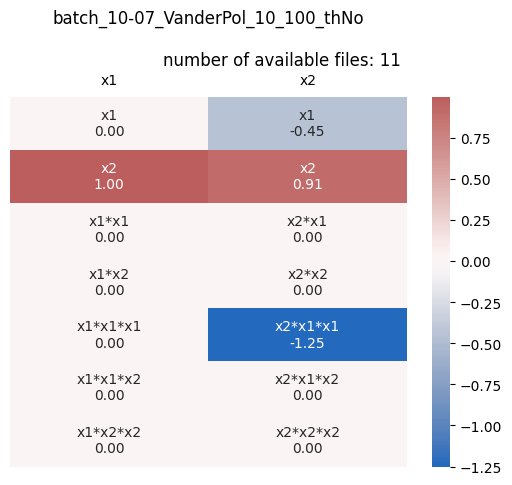

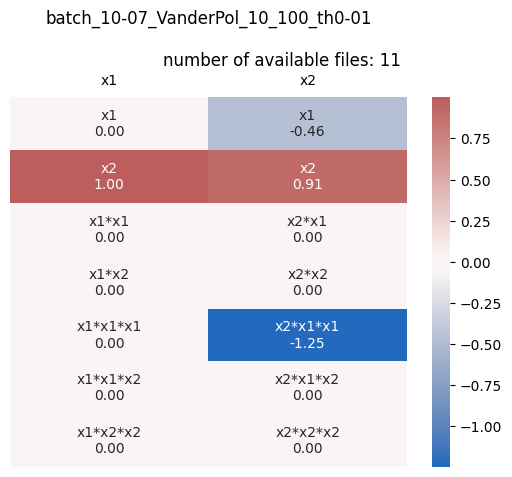

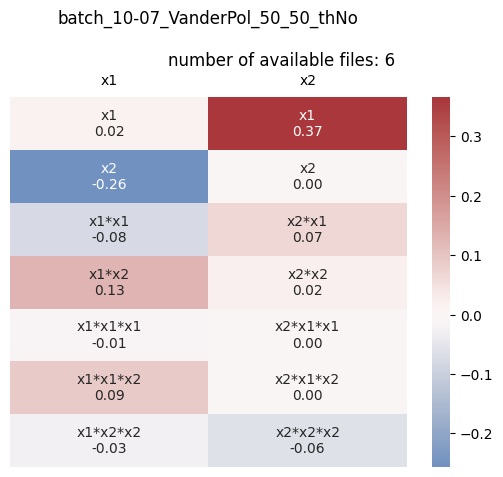

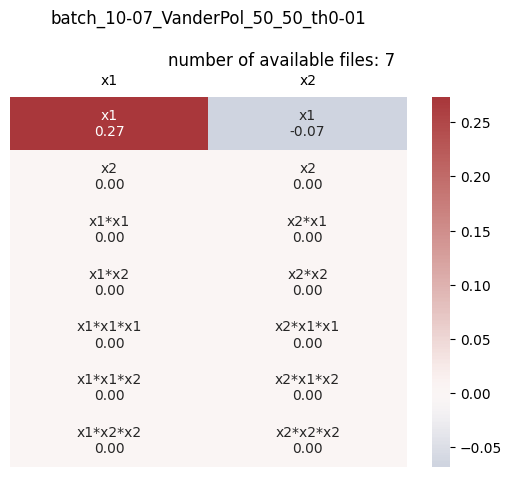

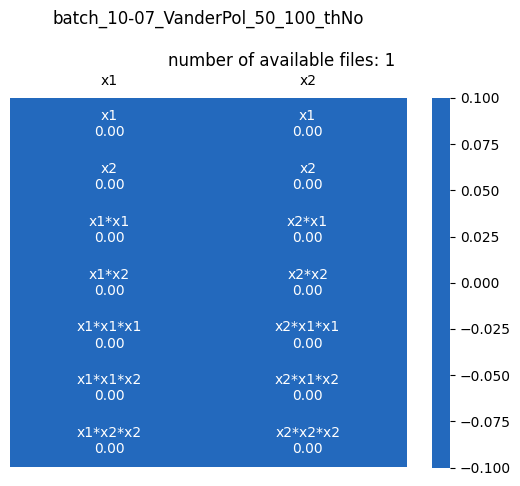

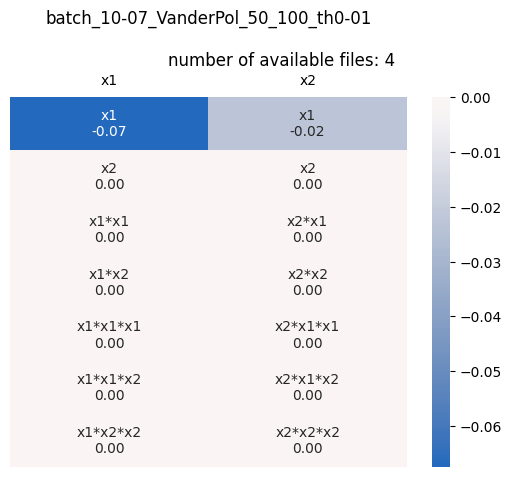

In [5]:
for hl_number in [5, 10, 50]:
    for hl_size in [50, 100]:
        for th in ["No", "0-01"]:
            int_order = 4
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(m.group(1))
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # create zero dataframe of the shape of the output
                file = os.listdir(out_dir)[0]
                out_tmp = f"{out_dir}output_{batch}_run{runs[0]}{spec}/Data/"
                df_sparsity_mask_all = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_sparsity_mask_all.iloc[:] = 0
                count = 0
                for run in runs:
                    out_tmp = f"{out_dir}output_{batch}_run{run}{spec}/Data/"
                    if os.path.exists(out_tmp):
                        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                        df_sparsity_mask_all += df_model_coeffs_tmp
                        count += 1

                df_sparsity_mask_all = df_sparsity_mask_all/count

                # read library values
                df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

                # define labels
                results = np.asarray(df_sparsity_mask_all)
                strings = np.asarray(df_library_tmp)
                labels = (np.asarray(["{0}\n{1:.2f}".format(string, value)
                                    for string, value in zip(strings.flatten(),
                                                            results.flatten())])
                        ).reshape(df_library_tmp.shape[0], n_taxa)
                
                # heatmap
                ax = sns.heatmap(df_sparsity_mask_all, cmap="vlag", center=0, annot=labels, fmt="", yticklabels=False)
                ax.xaxis.tick_top()
                ax.tick_params(left=False, top=False)
                ax.set_title(f"""{batch}_{hl_number}_{hl_size}_th{th}\n
                            number of available files: {count}""")
                plt.yticks(rotation=0)
                plt.show()

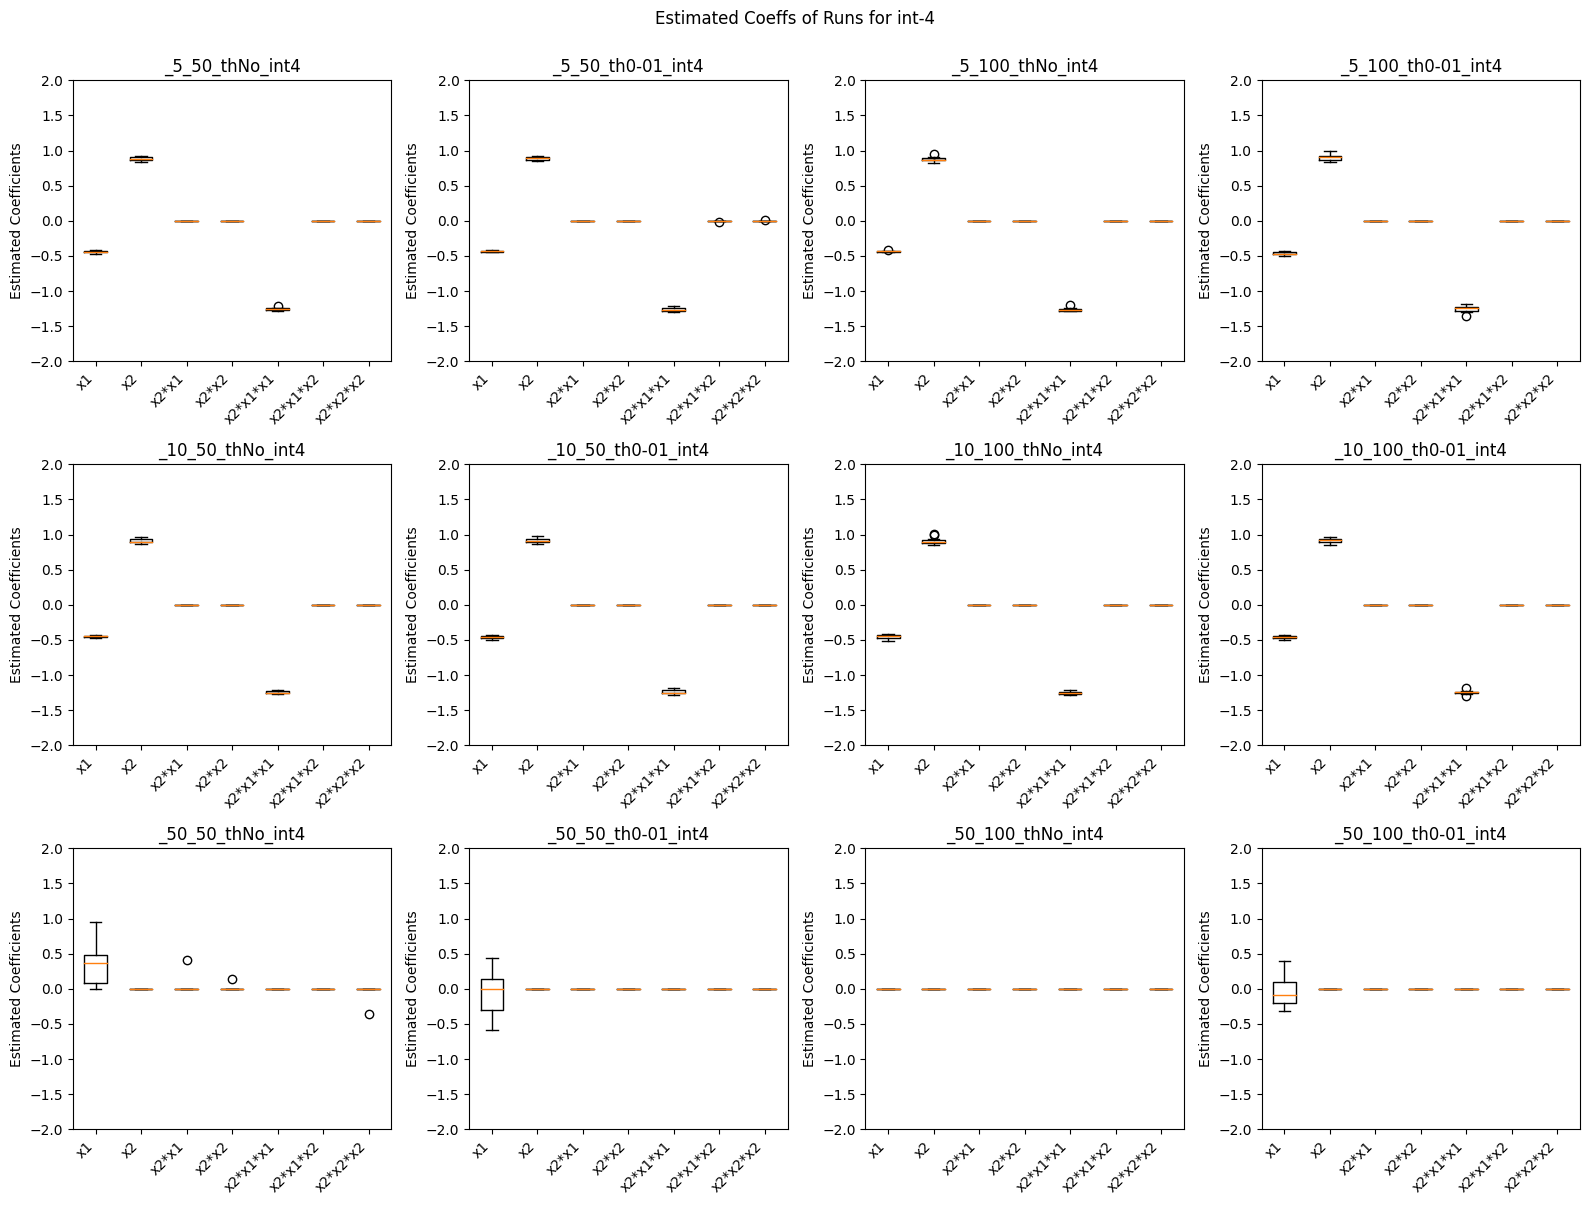

In [6]:
n_col = 4
n_row = 3

int_order = 4

# make plot
fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(4*n_col)
fig.set_figheight(4*n_row)
fig.suptitle(f"Estimated Coeffs of Runs for int-{int_order}", y=1.0)
fig.tight_layout(pad=4.0)
y = 0
for hl_number in [5, 10, 50]:
    for hl_size in [50, 100]:
        for th in ["No", "0-01"]:
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(m.group(1))
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                out_tmp = f"{out_dir}output_{batch}_run{runs[0]}{spec}/Data/"
                df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_model_coeff_all_x2 = df_model_coeffs_tmp.drop(columns=["x1"]).rename(columns={"x2": f'x2_run{runs[0]}'})
                if n_runs > 2:
                    for run in runs[1:]:
                        out_tmp = f"{out_dir}output_{batch}_run{run}{spec}/Data/"
                        if os.path.exists(out_tmp):
                            df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0]).rename(columns={"x2": f'x2_run{run}'})
                            df_model_coeff_all_x2 = df_model_coeff_all_x2.join(df_model_coeffs_tmp.drop(columns=["x1"]))

            df = df_model_coeff_all_x2.transpose()

            # read library values
            df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])
            library_x2 = df_library_tmp["x2"]

            # Create a boxplot with confidence intervals for each row
            boxplot = axs[int(y/n_col), (y % n_col)].boxplot(df.values)

            # Add labels
            axs[int(y/n_col), (y % n_col)].set_ylabel("Estimated Coefficients")
            axs[int(y/n_col), (y % n_col)].set_title(spec)
            axs[int(y/n_col), (y % n_col)].set_ylim(-2, 2)
            axs[int(y/n_col), (y % n_col)].set_xticklabels(library_x2, rotation=45, ha="right")

            y += 1

# Show the plot
plt.tight_layout()
plt.show()